In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score ,classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns 




In [2]:
from tkinter import Tk
from tkinter.filedialog import askdirectory

# Hide the main Tkinter window
Tk().withdraw()
# Print the selected folder
print(f"Please select the folder from the pop up, it will appear after you minimize this window:")
# Ask the user to select the folder with custom text
home_folder = askdirectory(title="Select the Project_submission folder")

# Check if a folder was selected
if not home_folder:
    print("No folder selected. Exiting.")
    exit()

# Print the selected folder or use it in your script
print(f"Selected folder: {home_folder}")


Please select the folder from the pop up, it will appear after you minimize this window:
Selected folder: D:/Others/Project_Submission_ALL_DATA


In [3]:
def generate_data( train_dir , test_dir , val_dir):
    
    IMAGE_SHAPE =(224 , 224)
    BATCH_SIZE=32

   
    train_datagen = ImageDataGenerator(rescale = 1/255. , rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

    val_datagen = ImageDataGenerator(rescale = 1/255.)
    test_datagen = ImageDataGenerator(rescale=1/255.)

    print("Training images:")
    train_data =train_datagen.flow_from_directory(train_dir ,
                                                target_size =IMAGE_SHAPE,
                                                batch_size = BATCH_SIZE,
                                                class_mode ="categorical",
                                                shuffle = True

                                                )
    print("Training images:")
    val_data =val_datagen.flow_from_directory(val_dir ,
                                                target_size =IMAGE_SHAPE,
                                                batch_size = BATCH_SIZE,
                                                class_mode ="categorical",
                                                shuffle = True)
    print("Testing images:")
    test_data =test_datagen.flow_from_directory(test_dir ,
                                                target_size =IMAGE_SHAPE,
                                                batch_size = 1,
                                                class_mode ="categorical",
                                                shuffle = False)
    
    return train_data , test_data , val_data

In [4]:


def load_model_with_best_weights(model_file_path):
    # Load the model architecture from the saved model file
    model = tf.keras.models.load_model(model_file_path)

    return model



In [5]:

def plot_classwise_metrics(y_true , y_pred, class_names , filename , figsize = (6 , 9)):
   
    # Calculate precision, recall, and F1-score for each class
    precision_per_class = []
    recall_per_class = []
    f1_score_per_class = []
    for i in range(len(class_names)):
        class_true = (y_true == i)
        class_pred = (y_pred == i)
        precision_per_class.append(precision_score(class_true, class_pred)*100)
        recall_per_class.append(recall_score(class_true, class_pred)*100)
        f1_score_per_class.append(f1_score(class_true, class_pred)*100)

    # Plot bar graph
    width = 0.25  # Width of each bar
    fig, ax = plt.subplots(figsize= figsize)
    plt.rcParams['pdf.fonttype']=42
    plt.rcParams['savefig.format'] = 'pdf'
    plt.rcParams['savefig.dpi'] = 400
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    # Position of bars on x-axis
    index = np.arange(len(class_names))

    # Plot bars for precision
    ax.bar(index - width, precision_per_class, width, label='Precision', color='purple')

    # Plot bars for recall
    ax.bar(index, recall_per_class, width, label='Recall', color='darkgrey')

    # Plot bars for F1-score
    ax.bar(index + width, f1_score_per_class, width, label='F1 Score', color='goldenrod')

    ax.set_xlabel('Class (Age)' , fontweight = 'bold',  fontsize = 12 )
    ax.set_ylabel('Scores (%)' , fontweight = 'bold' ,  fontsize = 12)
    ax.set_title('Class-wise Metrics' , fontweight = 'bold', fontsize = 12)
    ax.set_xticks(index)
    #ax.set_yticklabels(labels = None ,fontsize = 12)
    ax.set_xticklabels(class_names , fontsize = 14 , rotation = 0)
    ax.legend()
    plt.tight_layout()
    output_image_path = os.path.join(home_folder,"RESULTS/RESULT_IMAGES")
    #Uncomment to save the image
    # plt.savefig(os.path.join(output_image_path,filename) , format = 'pdf' , dpi = 400)
    plt.legend(loc='best' , fontsize = 12)
    plt.show()






In [6]:

def evaluate_multiclass(y_true, y_pred):
    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Compute precision
    precision = precision_score(y_true, y_pred, average='weighted')


    # Compute recall
    recall = recall_score(y_true, y_pred, average='weighted')

    # Compute f1-score
    f1score = f1_score(y_true , y_pred , average = 'weighted')

    # Report
    report = classification_report(y_true, y_pred, output_dict=True)


    return accuracy, precision, recall , f1score, report 






In [7]:
import pandas as pd

In [8]:
def cm_analysis(y_true, y_pred, labels , filename, annot_size , label_size , ticks_size ,figsize=(10,10) ):
    
    
    cm = confusion_matrix(y_true, y_pred)
    # calculate row sums (for calculating % & plot annotations)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    # calculate proportions
    cm_perc = cm / cm_sum.astype(float) * 100
    # empty array for holding annotations for each cell in the heatmap
    annot = np.empty_like(cm).astype(str)
    # get the dimensions
    nrows, ncols = cm.shape
    # cycle over cells and create annotations for each cell
    for i in range(nrows):
        for j in range(ncols):
            # get the count for the cell
            c = cm[i, j]
            # get the percentage for the cell
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                # convert the proportion, count, and row sum to a string with pretty formatting
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    # convert the array to a dataframe. To plot by proportion instead of number, use cm_perc in the DataFrame instead of cm
    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual Class'
    cm.columns.name = 'Predicted Class'
    # create empty figure with a specified size
    fig, ax = plt.subplots(figsize=figsize)
    plt.rcParams['pdf.fonttype']=42
    plt.rcParams['savefig.format'] = 'pdf'
    plt.rcParams['savefig.dpi'] = 400
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    # plot the data using the Pandas dataframe. To change the color map, add cmap=..., e.g. cmap = 'rocket_r'
    sns.heatmap(cm, annot=annot, fmt='', ax=ax , cmap = 'rocket_r' , annot_kws={"size": annot_size}  , yticklabels= True ,xticklabels=True , cbar=False)
    plt.xticks(rotation = 0 , ha = 'center', fontsize = ticks_size)
    plt.yticks(rotation = 0 , fontsize = ticks_size)
    ax.set_xlabel('Output  Class' , fontweight ='bold', fontsize = label_size )
    ax.set_ylabel('Target  Class' , fontweight ='bold' , fontsize = label_size )
    plt.title('Confusion Matrix' , fontweight = 'bold' , fontsize = label_size)
    output_image_path = os.path.join(home_folder,"RESULTS/RESULT_IMAGES")
    #Uncomment to save the image
    # plt.savefig(os.path.join(output_image_path,filename) , format= 'pdf' , dpi = 400)
    
    plt.show()
    


**Loading Model for 4 Classes Image  Classification**

In [9]:
train_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/train")
test_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/test")
val_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/4 Age Groups/val")

train_dir = os.path.join(home_folder, train_dir)
test_dir =  os.path.join(home_folder, test_dir)
val_dir = os.path.join(home_folder, val_dir)

train_data , test_data , val_data = generate_data(train_dir , test_dir , val_dir)

Training images:
Found 2008 images belonging to 4 classes.
Training images:
Found 426 images belonging to 4 classes.
Testing images:
Found 449 images belonging to 4 classes.


In [10]:
model_file_path = os.path.join(home_folder,"RESULTS/MODEL_FILES/Model_Files_4_Classes/model3.h5")
model = load_model_with_best_weights(model_file_path)

**Checking Accuracy of model on Test Data**

In [11]:
test_loss , test_accuracy = model.evaluate(test_data)
print(f"Test Loss : {test_loss} /n Test accuracy : {test_accuracy}")

449/449 [==============================] - 28s 60ms/step - loss: 1.1014 - accuracy: 0.7372
Test Loss : 1.101380705833435 /n Test accuracy : 0.737193763256073


**Plotting Confusion Matrix**

In [12]:
prediction_prob = model.predict(test_data)
y_pred = prediction_prob.argmax(axis = 1)
y_true = test_data.classes
class_names = ['g 4,1' , 'g 4,2' , 'g 4,3' , 'g 4,4']

449/449 [==============================] - 29s 63ms/step


**Print Classification Report**

In [13]:
accuracy , precision , recall , f1score , report= evaluate_multiclass(y_true , y_pred)
print(f" Accuracy : {accuracy} \n Precision : {precision} \n Recall : {recall} \n f1-score : {f1score}")

 Accuracy : 0.7371937639198218 
 Precision : 0.7549824746278081 
 Recall : 0.7371937639198218 
 f1-score : 0.7380474753769398


**Plot Confusion Matrix**

C:\Users\Chinmay\AppData\Local\Temp\ipykernel_10244\1954872921.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


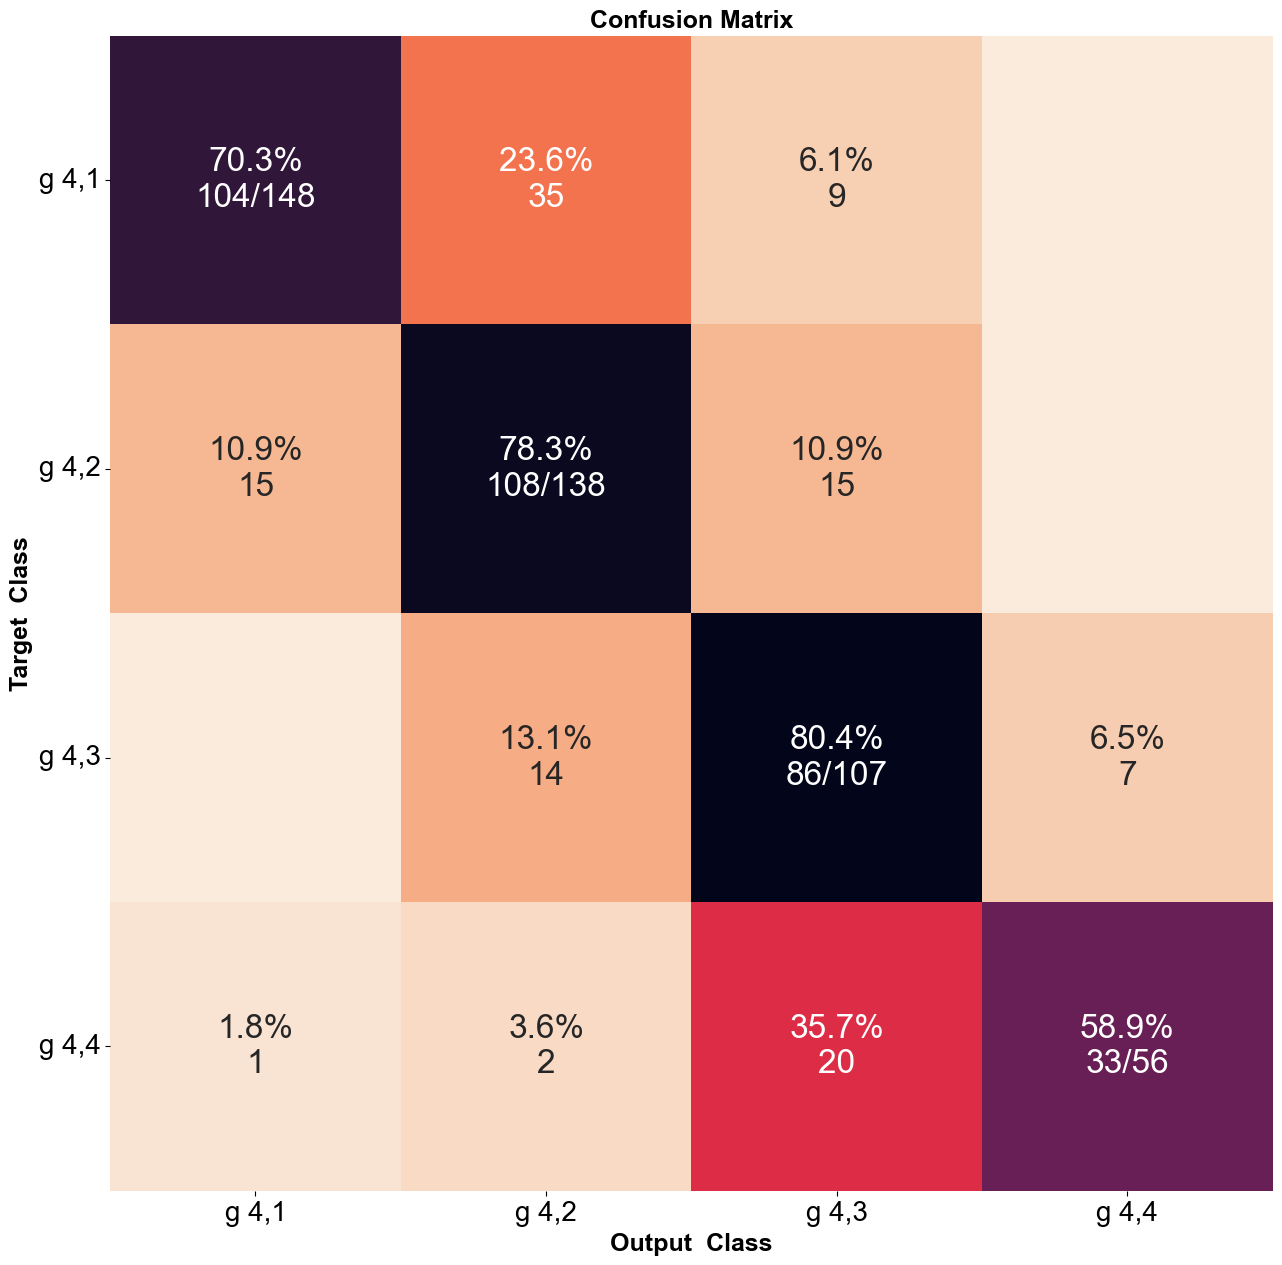

In [14]:
cm_analysis( y_true , y_pred , class_names , filename = 'Cm_4_classes.pdf', ticks_size= 20 , label_size = 18 , annot_size= 24 ,  figsize=(15, 15))

**Plot Classwise Metrics**

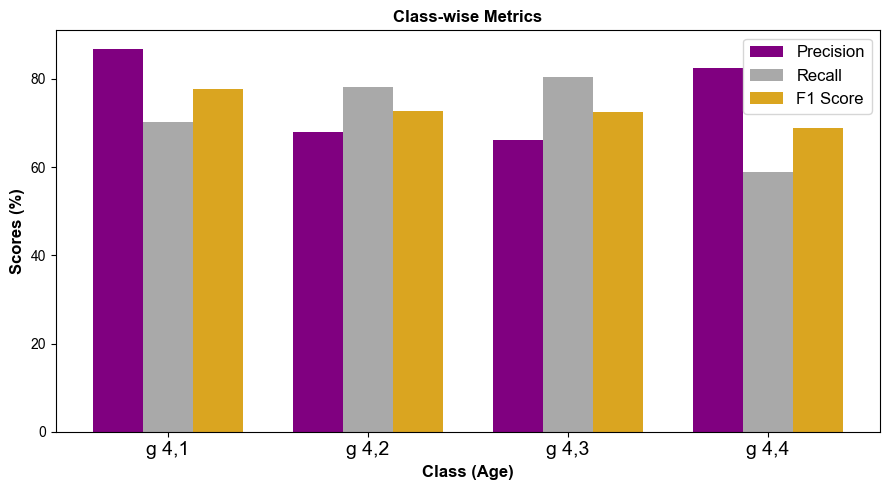

In [15]:
plot_classwise_metrics(y_true , y_pred, class_names , filename = 'Class_metrics_4_classes.pdf' , figsize = (9 , 5))

**Loading Model for 7 Classes Image  Classification**

In [16]:
train_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups/train")
test_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups/test")
val_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/7 Age Groups/val")

train_data , test_data , val_data = generate_data(train_dir , test_dir , val_dir)

Training images:
Found 2015 images belonging to 7 classes.
Training images:
Found 429 images belonging to 7 classes.
Testing images:
Found 439 images belonging to 7 classes.


In [17]:
model_file_path = os.path.join(home_folder,"RESULTS/MODEL_FILES/Model_Files_7_Classes/model3.h5")
model = load_model_with_best_weights(model_file_path)

In [18]:
test_loss , test_accuracy = model.evaluate(test_data)
print(f"Test Loss : {test_loss} /n Test accuracy : {test_accuracy}")

439/439 [==============================] - 27s 59ms/step - loss: 1.5593 - accuracy: 0.6241
Test Loss : 1.5593477487564087 /n Test accuracy : 0.6241458058357239


In [19]:
prediction_prob = model.predict(test_data)
y_pred = prediction_prob.argmax(axis = 1)
y_true = test_data.classes
class_names = ['g 7,1' , 'g 7,2' , 'g 7,3' , 'g 7,4' , 'g 7,5' , 'g 7,6' , 'g 7,7']

439/439 [==============================] - 31s 69ms/step


C:\Users\Chinmay\AppData\Local\Temp\ipykernel_10244\1954872921.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


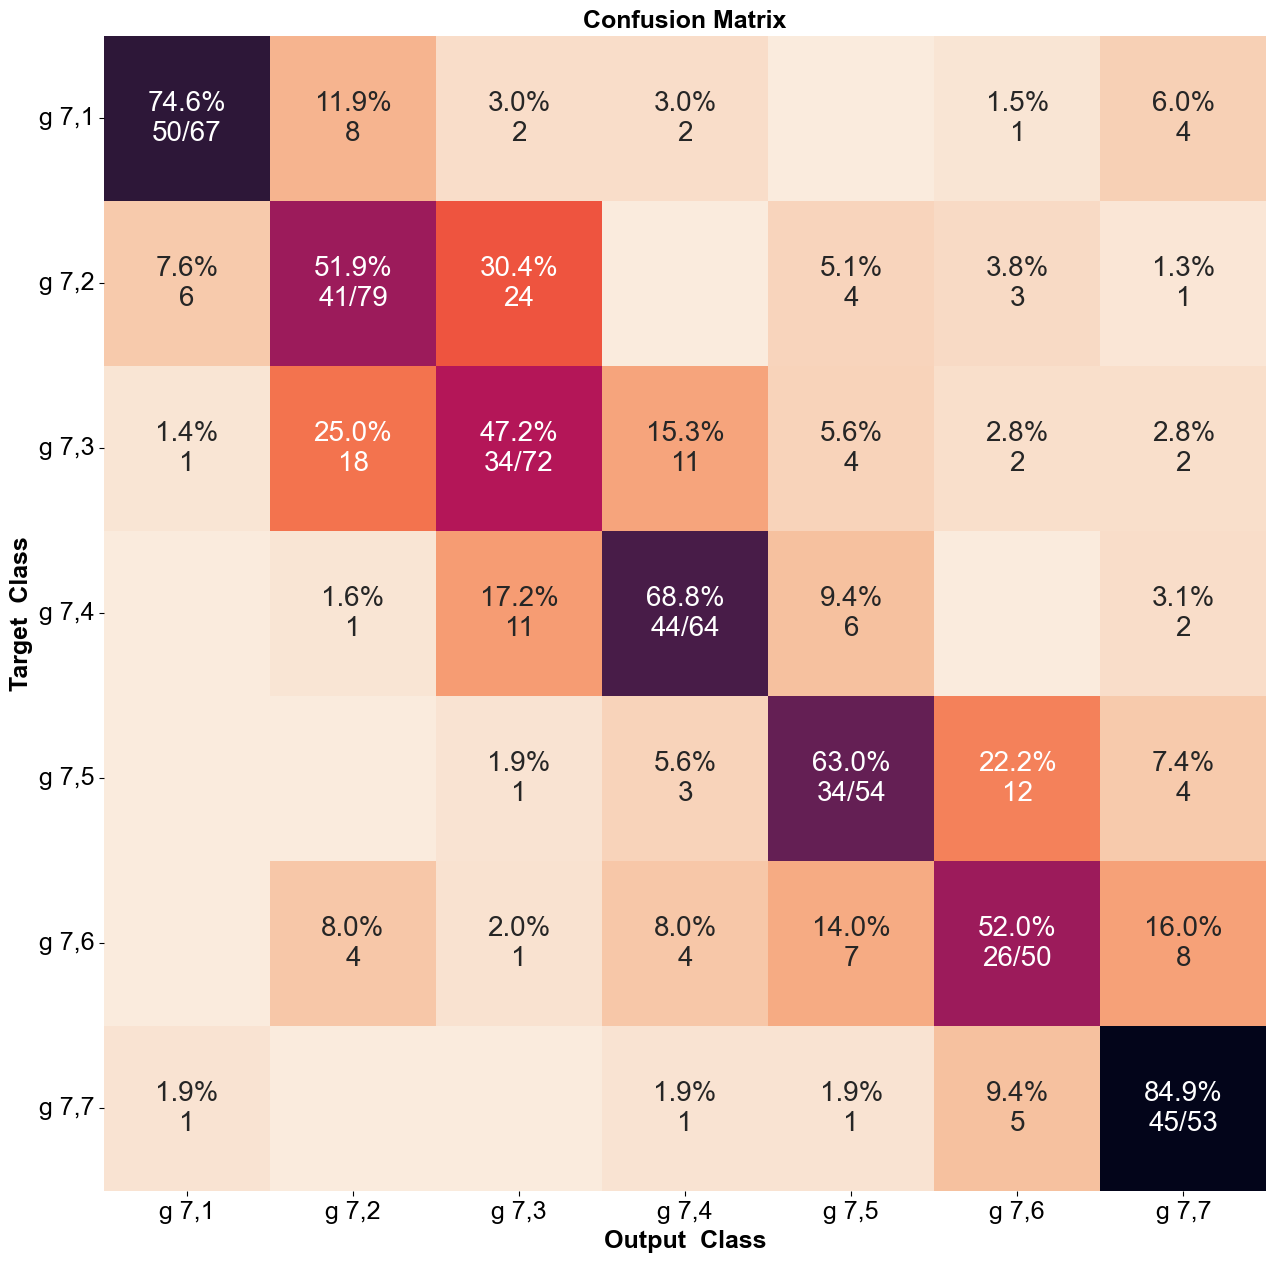

In [20]:
cm_analysis( y_true , y_pred , class_names , filename = 'Cm_7_classes.pdf', ticks_size= 18 , label_size = 18 , annot_size= 20 , figsize=(15,15))

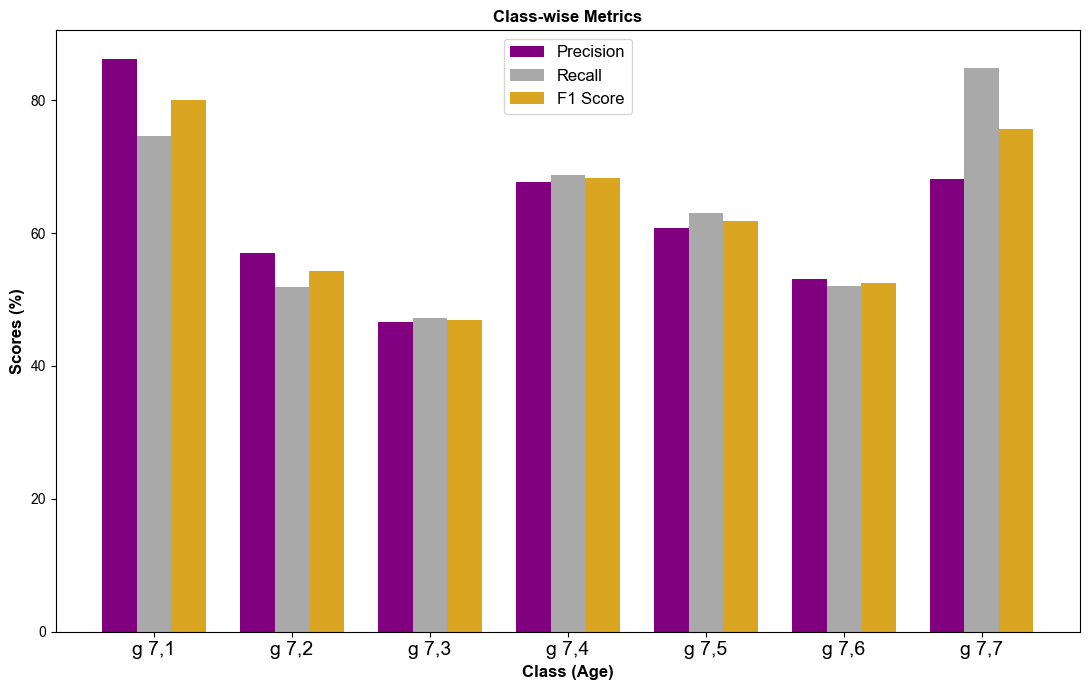

In [21]:
plot_classwise_metrics(y_true , y_pred, class_names , filename = 'Class_metrics_7_classes.pdf' , figsize = (11 , 7))

**Plotting Confusion Matrix for 15 Classes**

In [22]:
train_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/15 Age Groups/train")
test_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/15 Age Groups/test")
val_dir = os.path.join(home_folder,"Dataset/Cattle Dentition Datasets after Segmentation/15 Age Groups/val")

train_data , test_data , val_data = generate_data(train_dir , test_dir , val_dir)

Training images:
Found 2008 images belonging to 15 classes.
Training images:
Found 426 images belonging to 15 classes.
Testing images:
Found 449 images belonging to 15 classes.


In [26]:
model_file_path = os.path.join(home_folder,"RESULTS/MODEL_FILES/Model_Files_15_Classes/model7.h5")

model = load_model_with_best_weights(model_file_path)

In [27]:
test_loss , test_accuracy = model.evaluate(test_data)
print(f"Test Loss : {test_loss} /n Test accuracy : {test_accuracy}")

449/449 [==============================] - 19s 41ms/step - loss: 2.8654 - accuracy: 0.4365
Test Loss : 2.8654122352600098 /n Test accuracy : 0.4365256130695343


In [ ]:
prediction_prob = model.predict(test_data)
y_pred = prediction_prob.argmax(axis = 1)
y_true = test_data.classes
class_names = ['g 15,9', 'g 15,10', 'g 15,11', 'g 15,12', 'g 15,13', 'g 15,14', 'g 15,15', 'g 15,1', 'g 15,2', 'g 15,3', 'g 15,4', 'g 15,5', 'g 15,6', 'g 15,7', 'g 15,8']

449/449 [==============================] - 24s 53ms/step


C:\Users\Chinmay\AppData\Local\Temp\ipykernel_10244\1954872921.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


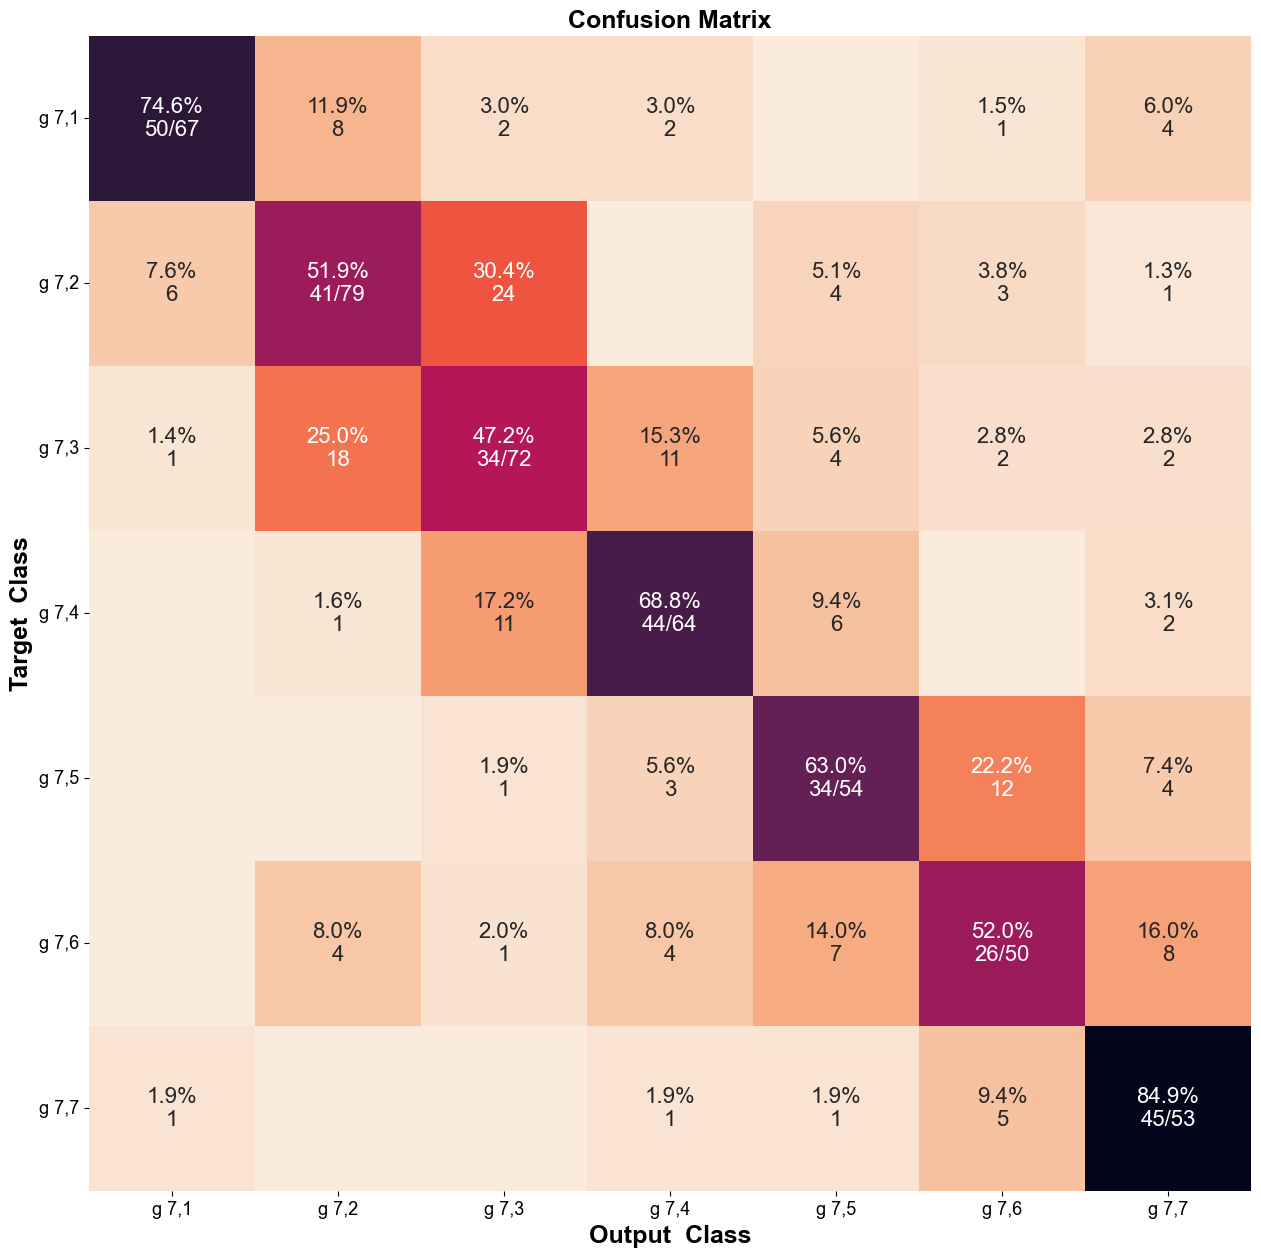

In [28]:
cm_analysis( y_true , y_pred , class_names , filename = 'Cm_15_classes.pdf', ticks_size= 13 , label_size = 18 , annot_size= 16 , figsize=(15 , 15))

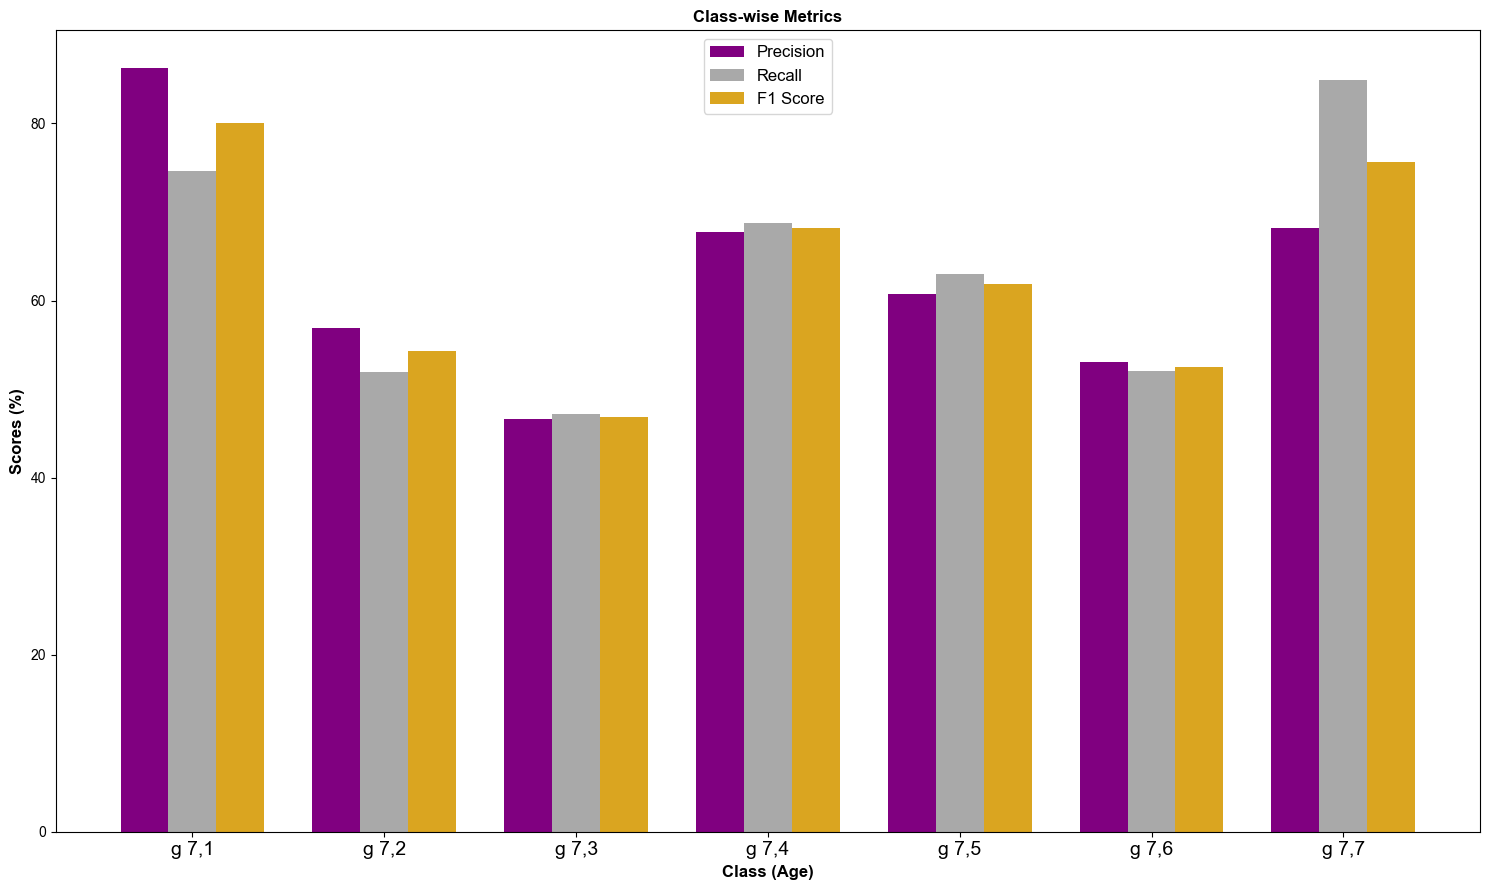

In [29]:
plot_classwise_metrics(y_true , y_pred, class_names , filename = 'Class_metrics_15_classes.pdf' , figsize = (15 , 9))